Data Pre-Processing/ SetUp

In [482]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [483]:
# Set up the file path for the input Excel file
file_path = '/Users/paraggupta/Desktop/projects/TVD_Associates/Data/Dataset_Full.xlsx'

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)

In [484]:
# Identify and convert numeric columns to numeric data type
numeric_cols = ['Amount Paid', 'Balance']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [485]:
# Convert the 'Date Registered' column to datetime
data['Date Registered'] = pd.to_datetime(data['Date Registered'], errors='coerce')
#Calculate the nimber of day since
data['Days_Registered'] = (datetime.datetime.today() - data['Date Registered']).dt.days

In [486]:
#Cretaed a Full name Column
data['Registrant Name | First'] = data['Registrant Name | First'].apply(lambda x: str.lower(str(x)))
data['Registrant Name | Last'] = data['Registrant Name | Last'].apply(lambda x: str.lower(str(x)))
data['full name'] =  data['Registrant Name | First'].str.cat(data['Registrant Name | Last'], sep=' ')
data

,Date Registered,Submission ID,Status,Member Type,Registered By,Discount Code,User ID,Registrant Name | Prefix,Registrant Name | First,Registrant Name | Middle,...,Museum-Guest-1,Museum-Guest-2,PD,ADA-Dietary,ADA-Dietary(2),Opt out,Amount Paid,Balance,Days_Registered,full name
0,2022-07-30 18:58:40,206660822,Registered,Member Contact,Rose Dolin,NaN,2011272045,NaN,breone,NaN,...,NaN,NaN,No,No,NaN,NaN,0.0,0,628,breone alcox-mcintosh
1,2022-03-31 17:52:53,206014882,Registered,Member Contact,Beth Alden,Rabid,2004099504,NaN,beth,NaN,...,NaN,NaN,Yes,No,NaN,NaN,370.0,0,749,beth alden
2,2022-05-23 16:50:22,206321207,Registered,Member Contact,Keren Allen,NaN,2004097280,NaN,keren,NaN,...,NaN,NaN,No,No,NaN,Opt-out,435.0,0,696,keren allen
3,2022-06-08 10:31:35,206401712,Registered,Prospect,Melyssa Allen,NaN,2010978409,NaN,susan,NaN,...,NaN,NaN,No,No,NaN,Opt-out,465.0,0,680,susan allen
4,2022-03-31 14:04:49,206012261,Registered,Individual Member,Daniela Alvarez,NaN,2010388558,NaN,daniela,NaN,...,NaN,NaN,Yes,No,NaN,NaN,395.0,0,749,daniela alvarez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2022-03-09 14:30:38,205871125,Registered,Member Contact,Mandy Zachgo,BOD,2006873264,NaN,mandy,NaN,...,NaN,NaN,No,No,NaN,Opt-out,40.0,0,771,mandy zachgo
385,2022-03-31 15:23:34,206013245,Registered,Member Contact,Patricia Zehna,Rabid,2006884575,NaN,patricia,NaN,...,NaN,NaN,No,No,NaN,NaN,410.0,0,749,patricia zehna
386,2022-05-27 17:12:55,206346327,Registered,Individual Member,Katrina Zwolinski,NaN,2010931186,NaN,katrina,NaN,...,NaN,NaN,No,No,NaN,Opt-out,395.0,0,692,katrina zwolinski
387,2022-07-06 11:30:38,206538977,Registered,Prospect,norman scarbrough,NaN,2011162523,NaN,norman,NaN,...,NaN,NaN,No,No,NaN,NaN,0.0,0,652,norman scarbrough


In [487]:
#grouping together zipcodes
zip_series = pd.Series(data['Address Main | Zip'])
zip_count = zip_series.value_counts()

#A DICTIONARY of all the zipcodes and of all their counts
zip_code_dict = dict(zip(zip_count.index, zip_count.values))
#For mapping purposes
str_zip = [str(num) for num in zip_count.index]
str_zip

['77027',
 '37752',
 '80230',
 '98683',
 '28608',
 '33614',
 '80526',
 '8057',
 '74107',
 '19046',
 '25306',
 '45236',
 '78701',
 '5061',
 '78224',
 '60173',
 '73107',
 '93901',
 '17201',
 '10522',
 '44663',
 '64850',
 '15222',
 '13753',
 '32352',
 '28801',
 '30043',
 '3801',
 '75098',
 '69025',
 '85709',
 '32653',
 '85730',
 '48867',
 '96744',
 '65202',
 '99164',
 '64156',
 '64108',
 '921',
 '67301',
 'N0P 2C0',
 '66603',
 '31792',
 '7054',
 '31030',
 '44805',
 '81601',
 '17584',
 '18508',
 '19010',
 '61434',
 '98498',
 '78363',
 '67701',
 '27804',
 '54401',
 '32304',
 '49202',
 '47907',
 '82240',
 '60477',
 '19103',
 '33563',
 '27613',
 '49601',
 '2459',
 '6447',
 '14802',
 '2864',
 '38401',
 '54912',
 '90064',
 '18428',
 '44109',
 '12167',
 '95765',
 '98903',
 'B6L 6A1',
 '78224-2417',
 '73460',
 '21740',
 '4037',
 '33024',
 '33772',
 '35633',
 '6854',
 '46530',
 '19934',
 '56201',
 '11101',
 '14214',
 '80120',
 '89502',
 '30030',
 '32507',
 '61201',
 '22405',
 '14618',
 '33710',
 '

In [488]:
#Chnaging the values of the zip-code to the their counts
data['Address Main | Zip'] = data['Address Main | Zip'].apply(lambda x: zip_code_dict.get(x, 0))
data['Address Main | Zip']

0      5
1      1
2      1
3      1
4      1
      ..
384    1
385    3
386    2
387    2
388    2
Name: Address Main | Zip, Length: 389, dtype: int64

In [489]:
#A DICTIONARY of all the Member Type and of all their Associated weights
member_type_dict = {'Member Contact': 0,'Prospect': 1,'Individual Member': 2,'Lifetime Member': 3}
data['Member Type'] = data['Member Type'].apply(lambda x: member_type_dict[x])
data['Member Type']

0      0
1      0
2      0
3      1
4      2
      ..
384    0
385    0
386    2
387    1
388    1
Name: Member Type, Length: 389, dtype: int64

In [490]:
#data['Discount Code'] = data['Discount Code'].apply(lambda x: 1 if isinstance(x,str) else 0) 
#Making Opt out a discrete column 
data['Opt out'] = data['Opt out'].apply(lambda x: 1 if isinstance(x,str) else 0)


In [491]:
#Make Museum column a discrete column
data['Museum'] = data['Museum'].apply(lambda x: 1 if isinstance(x,str) else 0)

In [492]:
#Make Discount Code column a discrete column
data['Discount Code'] = data['Discount Code'].apply(lambda x: 1 if isinstance(x,str) else 0)
data

,Date Registered,Submission ID,Status,Member Type,Registered By,Discount Code,User ID,Registrant Name | Prefix,Registrant Name | First,Registrant Name | Middle,...,Museum-Guest-1,Museum-Guest-2,PD,ADA-Dietary,ADA-Dietary(2),Opt out,Amount Paid,Balance,Days_Registered,full name
0,2022-07-30 18:58:40,206660822,Registered,0,Rose Dolin,0,2011272045,NaN,breone,NaN,...,NaN,NaN,No,No,NaN,0,0.0,0,628,breone alcox-mcintosh
1,2022-03-31 17:52:53,206014882,Registered,0,Beth Alden,1,2004099504,NaN,beth,NaN,...,NaN,NaN,Yes,No,NaN,0,370.0,0,749,beth alden
2,2022-05-23 16:50:22,206321207,Registered,0,Keren Allen,0,2004097280,NaN,keren,NaN,...,NaN,NaN,No,No,NaN,1,435.0,0,696,keren allen
3,2022-06-08 10:31:35,206401712,Registered,1,Melyssa Allen,0,2010978409,NaN,susan,NaN,...,NaN,NaN,No,No,NaN,1,465.0,0,680,susan allen
4,2022-03-31 14:04:49,206012261,Registered,2,Daniela Alvarez,0,2010388558,NaN,daniela,NaN,...,NaN,NaN,Yes,No,NaN,0,395.0,0,749,daniela alvarez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2022-03-09 14:30:38,205871125,Registered,0,Mandy Zachgo,1,2006873264,NaN,mandy,NaN,...,NaN,NaN,No,No,NaN,1,40.0,0,771,mandy zachgo
385,2022-03-31 15:23:34,206013245,Registered,0,Patricia Zehna,1,2006884575,NaN,patricia,NaN,...,NaN,NaN,No,No,NaN,0,410.0,0,749,patricia zehna
386,2022-05-27 17:12:55,206346327,Registered,2,Katrina Zwolinski,0,2010931186,NaN,katrina,NaN,...,NaN,NaN,No,No,NaN,1,395.0,0,692,katrina zwolinski
387,2022-07-06 11:30:38,206538977,Registered,1,norman scarbrough,0,2011162523,NaN,norman,NaN,...,NaN,NaN,No,No,NaN,0,0.0,0,652,norman scarbrough


Data Analysis

In [493]:
# Create a new column 'score' using a lambda function
data['score'] = data.apply(lambda row: row['Discount Code'] + row['Museum'] - row['Opt out']+0.01*row['Days_Registered']+0.001*row['Amount Paid']+row['Member Type']+0.1*row['Address Main | Zip'], axis=1)
data['score']

0       6.780
1       8.960
2       7.495
3       7.365
4       9.985
        ...  
384     8.850
385    10.200
386     8.515
387     7.720
388     7.720
Name: score, Length: 389, dtype: float64

In [494]:
#Scaling our Scores so that we have a mean of zero and a standard deviation of 1, for ease of analysis
scaler = StandardScaler()
data['score'] = scaler.fit_transform(data['score'].values.reshape(-1, 1))
data['score'] += 2

/var/folders/bj/pnpjngv10c56x2s0brvl85xc0000gn/T/ipykernel_23842/4031662827.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['score'], shade=True)


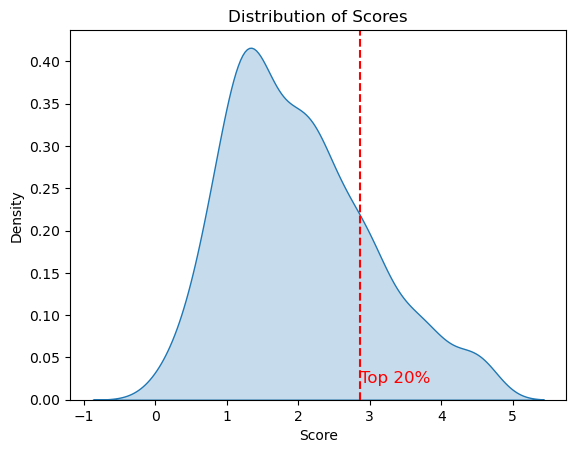

In [495]:
#visualize the distribution of the score We used a Kernel Density Estimation (KDE) Plot

#Kernel Density Estimation (KDE) Plot: A KDE plot is a smooth, continuous representation of the probability density function of a variable. It can help you visualize the overall shape of the distribution
#, including any potential multi-modality or skewness.
sns.kdeplot(data['score'], shade=True)

plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Density')

sorted_data = data['score'].sort_values()
twenty_percentile_value = sorted_data.quantile(0.8)
plt.axvline(x=twenty_percentile_value, color='r', linestyle='--')

plt.text(twenty_percentile_value, 0.02, 'Top 20%', color='r', fontsize=12, ha='left', va='bottom')

plt.show()

formula is:

Discount Code+Museum−Opt out+0.01×Days_Registered+0.001×Amount Paid+Member Type+0.1×Address Main | Zip

The distribution is slightly SKEWED TO THE RIGHT,
Overall, this KDE plot suggests that the scores in the dataset are CONCENTRATED AROUND 2

scores above 3, are the top 20% of the most engaged members

Mean of 2

with max value of 4.5

with min value of 0.4

Range of 0,5


Saving Results

In [496]:
new_file_path = '/Users/paraggupta/Desktop/projects/TVD_Associates/Data/Final_Dataset_Full.xlsx'
data.to_excel(new_file_path, index=False)

Creating a HeatMap of the US with Zipcode

In [497]:
def extract_value(name):
    try:
        # Find the row where the 'Name' column matches the given name
        row = data.loc[data['full name'] == name]
        
        # Extract value from the row based on another column
        eng_score = row['score'].values[0]  # Extracting age
        return eng_score
    except IndexError:
        return None  # Return None if name is not found

In [498]:
import json
import pandas as pd
import folium

# Sample zip code count data
data = {
    'Zip Code': zip_count.index, #str_zip,  
    'Count': zip_count.values
}

df = pd.DataFrame(data)

# Load GeoJSON file with all zip code boundaries
with open('/Users/paraggupta/Desktop/projects/TVD_Associates/usa_zip_codes_geo_15m.json') as f:
    geo_data = json.load(f)

# Filter GeoJSON data based on the zip codes in your DataFrame
filtered_features = [feature for feature in geo_data['features'] if feature['properties']['ZCTA5CE10'] in df['Zip Code'].tolist()]
filtered_geo_data = {
    'type': 'FeatureCollection',
    'features': filtered_features
}

# Create a map centered on the US
map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add choropleth layer using filtered GeoJSON data
folium.Choropleth(
    geo_data=filtered_geo_data,
    name='choropleth',
    data=df,
    columns=['Zip Code', 'Count'],
    key_on='feature.properties.ZCTA5CE10',  # Key in filtered GeoJSON file representing zip code
    fill_color='YlOrRd',  # Color scale
    fill_opacity=1,
    line_opacity=1,
    legend_name='Zip Code Count',
    tooltip=folium.GeoJsonTooltip(fields=['ZCTA5CE10'], aliases=['Zip Code']),
    highlight = True
).add_to(map)

# Add zip code labels
for feature in filtered_features:
    zip_code = feature['properties']['ZCTA5CE10']
    centroid = [sum([p[1] for p in feature['geometry']['coordinates'][0]]) / len(feature['geometry']['coordinates'][0]), 
                sum([p[0] for p in feature['geometry']['coordinates'][0]]) / len(feature['geometry']['coordinates'][0])]
    folium.Marker(location=centroid, 
                  popup=zip_code,
                  icon=None).add_to(map)

# Save the map
map.save("filtered_choropleth_map.html")
